In [1]:
import pandas as pd

df = pd.read_csv('/content/tweets.csv')
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [3]:
print(df.describe())
print(df.shape)
print(df.isnull().sum())

                id        label
count  7920.000000  7920.000000
mean   3960.500000     0.255808
std    2286.451399     0.436342
min       1.000000     0.000000
25%    1980.750000     0.000000
50%    3960.500000     0.000000
75%    5940.250000     1.000000
max    7920.000000     1.000000
(7920, 3)
id       0
label    0
tweet    0
dtype: int64


In [4]:
df['label'].value_counts()

,count
label,
0,5894
1,2026


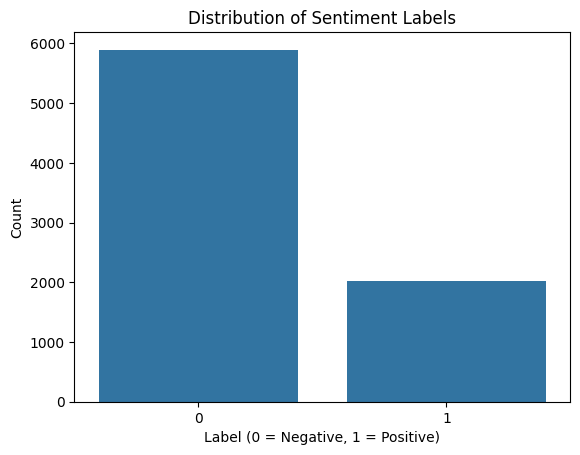

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='label', data=df,)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Label (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()


In [6]:
df['tweet']

,tweet
0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,Finally a transparant silicon case ^^ Thanks t...
2,We love this! Would you go? #talk #makememorie...
3,I'm wired I know I'm George I was made that wa...
4,What amazing service! Apple won't even talk to...
...,...
7915,Live out loud #lol #liveoutloud #selfie #smile...
7916,We would like to wish you an amazing day! Make...
7917,Helping my lovely 90 year old neighbor with he...
7918,Finally got my #smart #pocket #wifi stay conne...


In [7]:


import re
def clean_tweet(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)                     # remove mentions
    text = re.sub(r'#', '', text)                        # remove hashtags symbol
    text = re.sub(r'[^a-z\s]', '', text)                 # keep letters only
    text = re.sub(r'\s+', ' ', text).strip()             # normalize spaces
    return text

df['clean_tweet'] = df['tweet'].apply(clean_tweet)
df[['tweet', 'clean_tweet']].head()


,tweet,clean_tweet
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...
2,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...
3,I'm wired I know I'm George I was made that wa...,im wired i know im george i was made that way ...
4,What amazing service! Apple won't even talk to...,what amazing service apple wont even talk to m...


count    7920.000000
mean       15.356439
std         5.390693
min         1.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        51.000000
Name: word_count, dtype: float64


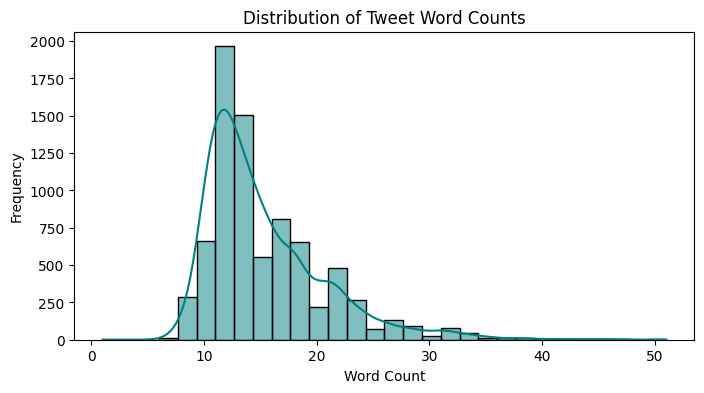

In [8]:

df['word_count'] = df['clean_tweet'].apply(lambda x: len(x.split()))
print(df['word_count'].describe())

plt.figure(figsize=(8,4))
sns.histplot(df['word_count'], bins=30, kde=True, color='teal')
plt.title('Distribution of Tweet Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
X = df['clean_tweet']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)




In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Initialize the vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# 2. Fit on training data and transform both train & test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

y_pred = lr_model.predict(X_test_tfidf)


Accuracy: 0.8845

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.95      0.92      1179
    Positive       0.84      0.68      0.75       405

    accuracy                           0.88      1584
   macro avg       0.87      0.82      0.84      1584
weighted avg       0.88      0.88      0.88      1584



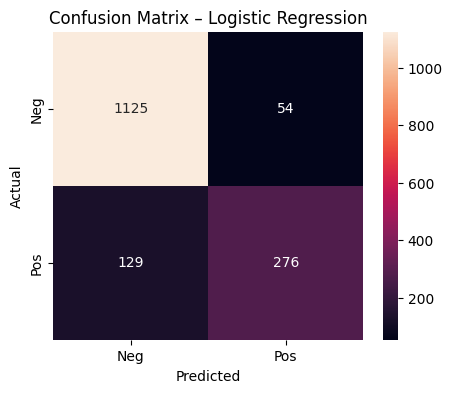

In [20]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

y_pred = lr_model.predict(X_test_tfidf)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Neg','Pos'], yticklabels=['Neg','Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Logistic Regression')
plt.show()


In [21]:
sample_df = pd.DataFrame({'Tweet': X_test.sample(10, random_state=1)})
sample_tfidf = tfidf.transform(sample_df['Tweet'])
sample_df['Predicted_Label'] = lr_model.predict(sample_tfidf)
sample_df['Predicted_Label'] = sample_df['Predicted_Label'].map({0:'Negative', 1:'Positive'})
sample_df

,Tweet,Predicted_Label
2883,followsunday followback rt teamfollowback foll...,Negative
6088,the best happy ending scene ever sad ending is...,Negative
855,genius of shoutouts indian malayali fun tbt tb...,Negative
4147,happy mothers day art artistic beauty leider l...,Negative
3759,work hard play hard iphone apple iphonegang ba...,Negative
1776,picture in picture rosengarten spring holiday ...,Negative
1668,waiting ilmi with samsung gadget android galax...,Negative
2248,happy vibes fruitstickers recycleart efrenave ...,Negative
6595,we would like to wish you an amazing day make ...,Negative
2538,i love how apple wont let me download a free u...,Positive
